# Limpieza de datos

In [1]:
!pip install --upgrade pip -q

ERROR: To modify pip, please run the following command:
C:\Users\Juan Guzman\anaconda3\python.exe -m pip install --upgrade pip -q


In [2]:
!pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1 -q

In [3]:
import janitor # crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno #visualizar valores faltantes
import numpy as np
import pandas as pd
import pyreadr #leer archivos
import seaborn as sns
import session_info
import upsetplot

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Juan Guzman\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\Juan Guzman\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
c:\Users\Juan Guzman\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
c:\Users\Juan Guzman\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are dep

# Datos
Fueron extraidos a partir de un trabajo de web scrapin realizado por 2 estudiantes de la UdeA, 
Este es el repositorio de donde se extrajo:

https://github.com/andres-soto-h/monografia-udea-eacd

In [4]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\consolidado_propiedades_FR_30052021.csv', delimiter=';', encoding='latin1')
dfp.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,En zona Comercial,Finca cafetera,Servicio de Lavandería,Altura restringida,Ascensor(es) inteligente(s),Lote Vacio,Control de Acústica,Control térmico,Panorámica 360º,Con cerca eléctrica
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfp.info(show_counts=True, max_cols=190)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 188 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    tipo                           2715 non-null   object 
 1    url                            2715 non-null   object 
 2    titulo                         2715 non-null   object 
 3    precio                         2715 non-null   object 
 4    area                           2715 non-null   object 
 5    habitaciones                   2715 non-null   object 
 6    banos                          2715 non-null   object 
 7    garajes                        2715 non-null   object 
 8    descripcion                    2715 non-null   object 
 9    Balcón                         1401 non-null   float64
 10   Baño de Servicio               201 non-null    float64
 11   Chimenea                       459 non-null    float64
 12   Cocina Equipada                3

In [6]:
dfp.shape

(2715, 188)

In [7]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'Balcón',
       ...
       'En zona Comercial', 'Finca cafetera', 'Servicio de Lavandería',
       'Altura restringida', 'Ascensor(es) inteligente(s)', 'Lote Vacio',
       'Control de Acústica', 'Control térmico', 'Panorámica 360º',
       'Con cerca eléctrica'],
      dtype='object', length=188)

## deteccion de valores faltantes

1. cuantos valores existen por cada variable
2. cuantos nan por cada observacion
3. Cuantas variables, filas tienen X numeros de valores faltantes, para ver donde se acumulan estos nan

### numero de NaN por varible

In [10]:
# vistaso general de los valores faltante spor variable
dfp.isna().sum()

tipo                      0
url                       0
titulo                    0
precio                    0
area                      0
                       ... 
Lote Vacio             2714
Control de Acústica    2713
Control térmico        2713
Panorámica 360º        2714
Con cerca eléctrica    2714
Length: 188, dtype: int64

In [16]:
# Se observan muchas filas con gran cantidad de nan
sorted(dfp.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 80,
 527,
 922,
 1111,
 1314,
 1341,
 1370,
 1533,
 1547,
 1573,
 1614,
 1692,
 1756,
 1816,
 1854,
 1942,
 1980,
 1988,
 2007,
 2022,
 2044,
 2048,
 2071,
 2106,
 2116,
 2144,
 2150,
 2158,
 2178,
 2179,
 2189,
 2200,
 2206,
 2256,
 2259,
 2265,
 2271,
 2308,
 2320,
 2333,
 2337,
 2348,
 2353,
 2355,
 2356,
 2357,
 2378,
 2382,
 2386,
 2386,
 2388,
 2403,
 2404,
 2411,
 2417,
 2425,
 2434,
 2465,
 2508,
 2509,
 2513,
 2514,
 2515,
 2518,
 2519,
 2523,
 2526,
 2537,
 2549,
 2557,
 2569,
 2573,
 2575,
 2577,
 2583,
 2594,
 2600,
 2604,
 2605,
 2609,
 2616,
 2617,
 2619,
 2619,
 2622,
 2622,
 2631,
 2638,
 2639,
 2644,
 2649,
 2650,
 2651,
 2661,
 2662,
 2670,
 2671,
 2672,
 2672,
 2675,
 2681,
 2682,
 2682,
 2683,
 2685,
 2685,
 2686,
 2686,
 2689,
 2689,
 2690,
 2691,
 2696,
 2696,
 2697,
 2697,
 2698,
 2698,
 2700,
 2700,
 2701,
 2701,
 2702,
 2703,
 2704,
 2704,
 2705,
 2705,
 2705,
 2706,
 2706,
 2707,
 2707,
 2707,
 2707,
 2708,
 270

In [34]:
dfNan = dfp.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda dfp: (
                            dfp.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(dfp), # numero total de registros en el df original
                                    pct_missing = lambda dfp1 : dfp1.numero_Nan / dfp1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
...,...,...,...,...
183,Lote Vacio,2714,2715,99.963168
184,Control de Acústica,2713,2715,99.926335
185,Control térmico,2713,2715,99.926335
186,Panorámica 360º,2714,2715,99.963168


Text(0, 0.5, 'Variable en orden ascendente en razon al numero de Nan')

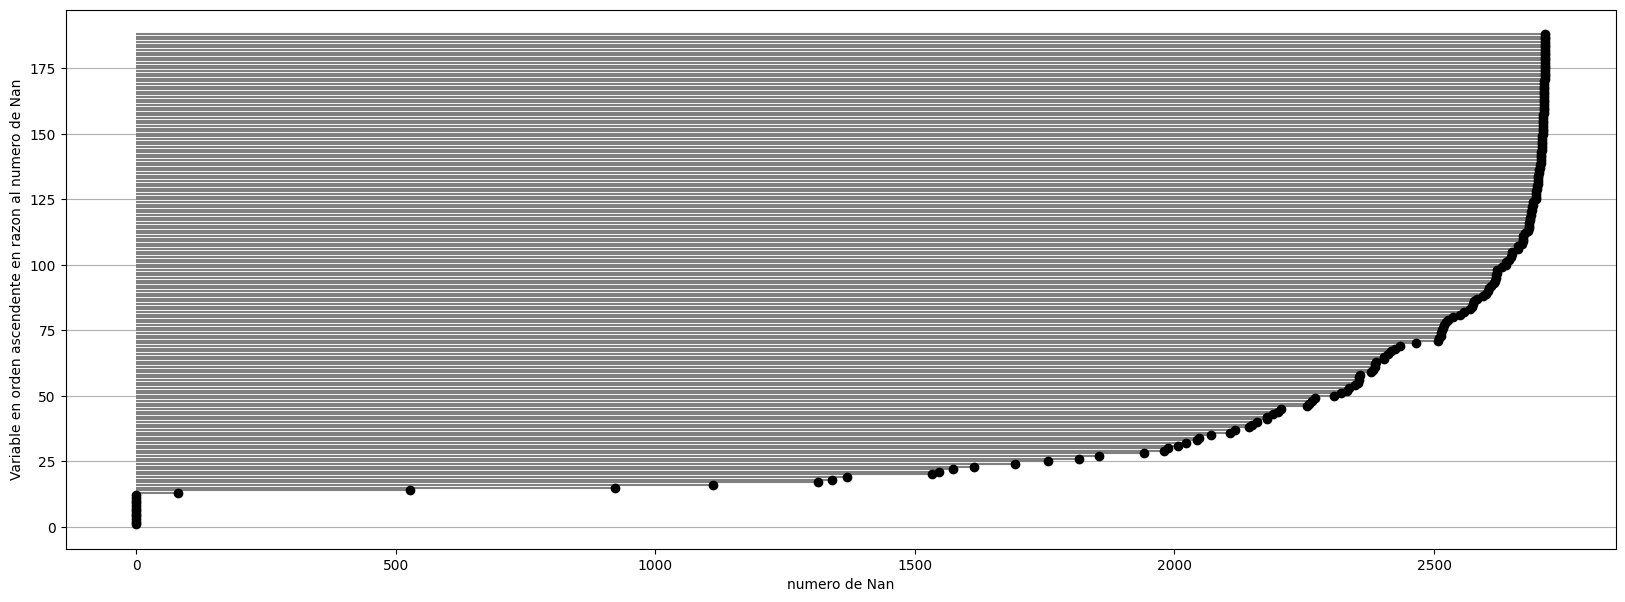

In [54]:
# grafica de los Nan
plt.figure(figsize=(20,7))
dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
# plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
plt.xlabel("numero de Nan")
plt.ylabel("Variable en orden ascendente en razon al numero de Nan")

In [78]:
sumnan = sum(dfNan['numero_Nan']>1900)
pornandfp = sumnan/ len(dfp.columns) * 100
print(f'porcentaje de variables que tienne mas de 2000 valores faltantes {round(pornandfp,0)} lo que equivale a {sumnan} variables de {dfp.shape[1]}')

porcentaje de variables que tienne mas de 2000 valores faltantes 86.0 lo que equivale a 161 variables de 188


De esta grafica que nos organiza las variables de manera ascendente por numero de valores faltantes se puede observar que 84% de las variables presentan una cantidad de nan mayores a 2000, lo que equivale a 161 variables de 181 , por lo que se asume que estas variables no son de gran utilidad para el objetivo del proyecto

## eliminacion de columnas innecesarias

debido a que las columnas que se van a eliminar tienne una grandisima cantidad de valores faltantes no se podran imputar ni tratas, por lo tanto se eliminaran